# Keras Simple CNN for MNIST

This notebook was developed for the Kaggle Digit Resognizer competition [here](https://www.kaggle.com/c/digit-recognizer). 

The example by fchollet online [here](https://keras.io/examples/vision/mnist_convnet/) served as a starting point.  

# Setup 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
num_classes = 10
input_shape = (28, 28, 1)

In [4]:
os.getcwd()

'/kaggle/working'

# Load Data

In [5]:
# Load Data
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train_df.shape, test_df.shape

((42000, 785), (28000, 784))

In [6]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# preview classes
np.sort(pd.unique(train_df.iloc[:,0]))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Format Data

In [9]:
# DataFrame to numpy
x = train_df.iloc[:,1:].to_numpy()
y = train_df.iloc[:,0].to_numpy()
x_comp = test_df.to_numpy()

x.shape, y.shape, x_comp.shape

((42000, 784), (42000,), (28000, 784))

In [10]:
# scale images to the [0, 1] range
x = x.astype('float32') / 255.
y = y.astype('float32') 

x_comp = x_comp.astype('float32') / 255.

In [11]:
# set shape to (samples, 28, 28, 1)
x = x.reshape(-1, 28, 28, 1)
x_comp = x_comp.reshape(-1, 28, 28, 1)

In [12]:
# convert class vectors (class integers) to binary class matrices (one-hot encoding)

y = keras.utils.to_categorical(y, num_classes)

In [13]:
# Divide dataset into train, test, and validation sets

# randomize order
order = np.random.permutation(len(y))

# set for training
x_train = x[0:int(len(y) * 0.6)]
y_train = y[0:int(len(y) * 0.6)]

# set for testing training
x_val = x[int(len(y) * 0.6):int(len(y) * 0.8)]
y_val = y[int(len(y) * 0.6):int(len(y) * 0.8)]

# set for validating model after training
x_test = x[int(len(y) * 0.9):]
y_test = y[int(len(y) * 0.9):]

print(x_train.shape, x_test.shape, x_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(25200, 28, 28, 1) (4200, 28, 28, 1) (8400, 28, 28, 1)
(25200, 10) (4200, 10) (8400, 10)


# Define the Model

In [14]:
# Build the model

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [15]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Training

In [16]:
# Train the model 

batch_size = 128 
epochs = 15

history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(x_val, y_val))

Epoch 1/15
197/197 [==============================] - 11s 54ms/step - loss: 0.5759 - accuracy: 0.8266 - val_loss: 0.1686 - val_accuracy: 0.9519
Epoch 2/15
197/197 [==============================] - 11s 57ms/step - loss: 0.1693 - accuracy: 0.9479 - val_loss: 0.1053 - val_accuracy: 0.9681
Epoch 3/15
197/197 [==============================] - 10s 53ms/step - loss: 0.1223 - accuracy: 0.9630 - val_loss: 0.0854 - val_accuracy: 0.9732
Epoch 4/15
197/197 [==============================] - 10s 52ms/step - loss: 0.0991 - accuracy: 0.9696 - val_loss: 0.0707 - val_accuracy: 0.9801
Epoch 5/15
197/197 [==============================] - 11s 54ms/step - loss: 0.0849 - accuracy: 0.9737 - val_loss: 0.0625 - val_accuracy: 0.9817
Epoch 6/15
197/197 [==============================] - 10s 52ms/step - loss: 0.0775 - accuracy: 0.9763 - val_loss: 0.0609 - val_accuracy: 0.9817
Epoch 7/15
197/197 [==============================] - 10s 52ms/step - loss: 0.0715 - accuracy: 0.9773 - val_loss: 0.0561 - val_accuracy:

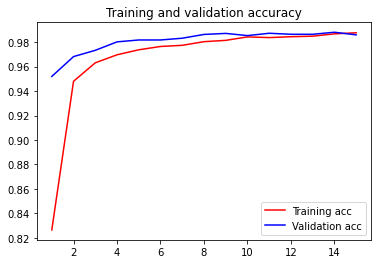

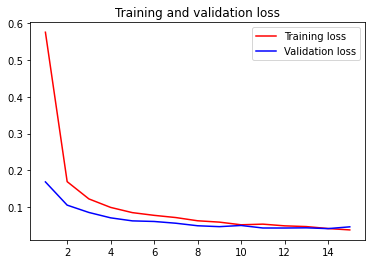

In [18]:
# VISUALIZE RESULTS

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv').head()

In [ ]:
test_df.shape

In [ ]:
result = model.predict(
                    x_comp,
                    batch_size=batch_size,
                    verbose=0)

In [ ]:
# Turn probabilites into class indices. 
pred = result.argmax(axis=-1)

# Format result as csv for submission to Kaggle

In [ ]:
ImageId = np.array(range(1, len(pred)+1), dtype=np.int64)
ImageId.shape

In [ ]:
df = pd.DataFrame(data= {'ImageId': ImageId, 'Label': pred})

In [ ]:
df.head()

In [ ]:
df.to_csv('result.csv', header=True, index=False)

In [ ]:
from IPython.display import FileLink

FileLink(r'result.csv')